In [10]:
import importlib
import matplotlib.pyplot as plt
import pandas as pd
import analysis_module as am
import analysis_visualization as av
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier


importlib.reload(am)
importlib.reload(av)

<module 'analysis_visualization' from '/Users/ash/Desktop/Final_project/analysis_visualization.py'>

In [2]:
# Load datasets
liar_data = am.load_liar_dataset('valid.tsv')
sentiment_data = am.load_sentiment140_dataset('sentiment140_dataset.csv')

# Perform sentiment analysis
liar_data = am.analyze_sentiment(liar_data, 'Statement')
sentiment_data = am.analyze_sentiment(sentiment_data, 'Text')

# Compute word count for LIAR dataset
liar_data = am.compute_word_count(liar_data, 'Statement')

# Analyze misinformation patterns
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(liar_data['Statement'])
y = liar_data['Label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate Naive Bayes model
nb_model = am.train_naive_bayes_model(X_train, y_train)
am.evaluate_model(nb_model, X_test, y_test)

# Save processed datasets
am.save_dataset(liar_data, 'liar_sentiment_analysis.csv')
am.save_dataset(sentiment_data, 'sentiment140_analysis.csv')


Accuracy for Misinformation Detection: 0.25680933852140075
Classification Report for Misinformation Detection:
               precision    recall  f1-score   support

 barely-true       0.21      0.18      0.20        49
       false       0.32      0.43      0.37        51
   half-true       0.26      0.24      0.25        59
 mostly-true       0.32      0.40      0.36        47
  pants-fire       0.00      0.00      0.00        27
        true       0.08      0.08      0.08        24

    accuracy                           0.26       257
   macro avg       0.20      0.22      0.21       257
weighted avg       0.23      0.26      0.24       257

Dataset saved to liar_sentiment_analysis.csv
Dataset saved to sentiment140_analysis.csv


In [18]:
liar_data = pd.read_csv('liar_sentiment_analysis.csv')
sentiment_data = pd.read_csv('sentiment140_analysis.csv')

# Ensure columns are loaded correctly
print("LIAR Dataset Columns:", liar_data.columns)
print("Sentiment140 Dataset Columns:", sentiment_data.columns)

LIAR Dataset Columns: Index(['Label', 'Statement', 'Sentiment', 'Word Count'], dtype='object')
Sentiment140 Dataset Columns: Index(['Polarity', 'Text', 'Sentiment'], dtype='object')


Sentiment Distribution by Label:
 Sentiment    Negative  Positive
Label                          
barely-true  0.696203  0.303797
false        0.615970  0.384030
half-true    0.689516  0.310484
mostly-true  0.661355  0.338645
pants-fire   0.672414  0.327586
true         0.597633  0.402367


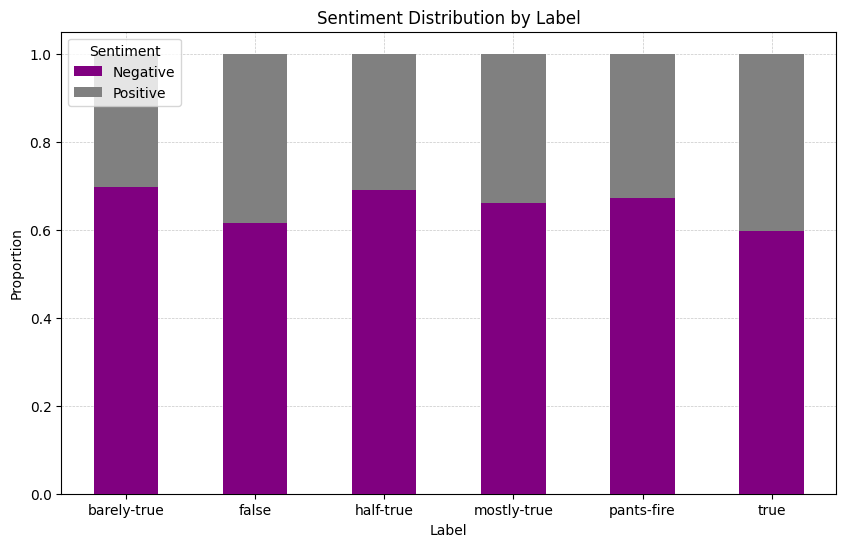

Average Word Count by Sentiment:
 Sentiment
Negative    17.072361
Positive    19.555556
Name: Word Count, dtype: float64


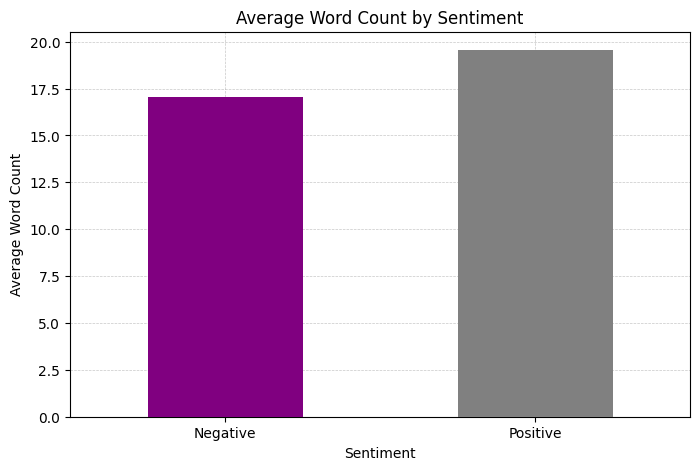

Average Word Count by Label:
 Label
barely-true    18.181435
false          16.433460
half-true      19.451613
mostly-true    18.454183
pants-fire     17.112069
true           17.420118
Name: Word Count, dtype: float64


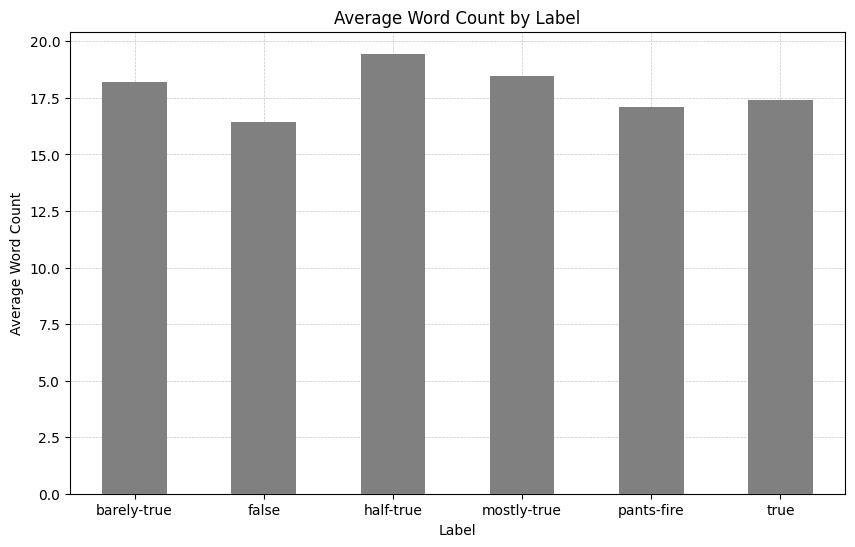

Label
barely-true    18.181435
false          16.433460
half-true      19.451613
mostly-true    18.454183
pants-fire     17.112069
true           17.420118
Name: Word Count, dtype: float64

In [19]:
# Load the processed datasets
liar_data = av.load_processed_dataset('liar_sentiment_analysis.csv')
sentiment_data = av.load_processed_dataset('sentiment140_analysis.csv')

# Sentiment distribution by label
av.sentiment_distribution_by_label(liar_data, label_col='Label', sentiment_col='Sentiment')

# Average word count by sentiment
av.average_word_count_by_sentiment(liar_data, sentiment_col='Sentiment', word_count_col='Word Count')

# Average word count by label
av.average_word_count_by_label(liar_data, label_col='Label', word_count_col='Word Count')


In [20]:
import topic_analysis as tam

# Load preprocessed LIAR dataset
liar_data = pd.read_csv('liar_sentiment_analysis.csv')

# Perform topic modeling
liar_data, topics = tam.perform_topic_modeling(
    liar_data, text_column='Statement', ngram_range=(2, 3), n_topics=5
)


Topic 1: says sen state budget 10 percent african american federal government illegal immigrants rick perry years ago says texas new jersey
Topic 2: 500 million 40 percent ted cruz million jobs illegal immigrants billion year says new wall street mitt romney social security
Topic 3: says hillary clinton says hillary health care reform care reform health care plan care plan 000 year obama administration hillary clinton health care
Topic 4: new york income tax president obama says donald trump says donald gov scott walker gov scott scott walker donald trump united states
Topic 5: says president president barack obamas president barack obama supreme court barack obamas health care law care law health care president barack barack obama


Sentiment Distribution by Topic:
 Sentiment Category  Negative   Neutral  Positive
Topic                                           
0                   0.368209  0.352113  0.279678
1                   0.347826  0.358696  0.293478
2                   0.270142  0.203791  0.526066
3                   0.390863  0.294416  0.314721
4                   0.317949  0.343590  0.338462


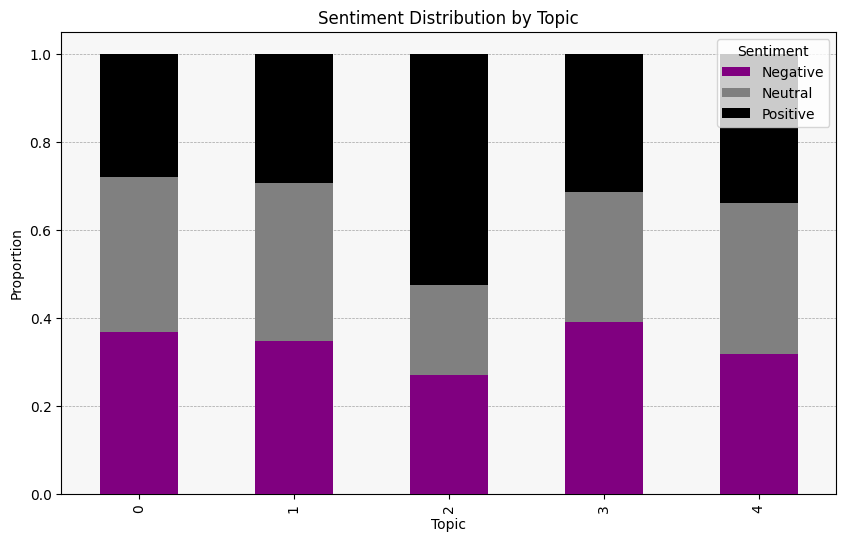

False Statement Ratio by Topic:
 Topic
0    0.309859
1    0.266304
2    0.355450
3    0.228426
4    0.287179
dtype: float64


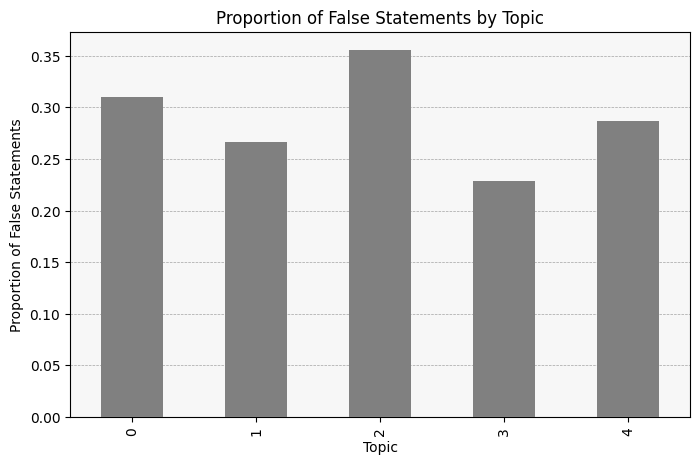

Average Sentiment by Label and Topic:
 Label  barely-true     false  half-true  mostly-true  pants-fire      true
Topic                                                                     
0        -0.105341 -0.009309  -0.112420    -0.087710   -0.033015 -0.006282
1        -0.053579 -0.061160  -0.019118     0.095550   -0.071611 -0.044214
2        -0.043433  0.256123   0.044658     0.204716    0.079709  0.134232
3         0.002600 -0.053663  -0.060684    -0.115789   -0.238569  0.162533
4         0.079205  0.085645  -0.067900    -0.020480   -0.170170  0.063705


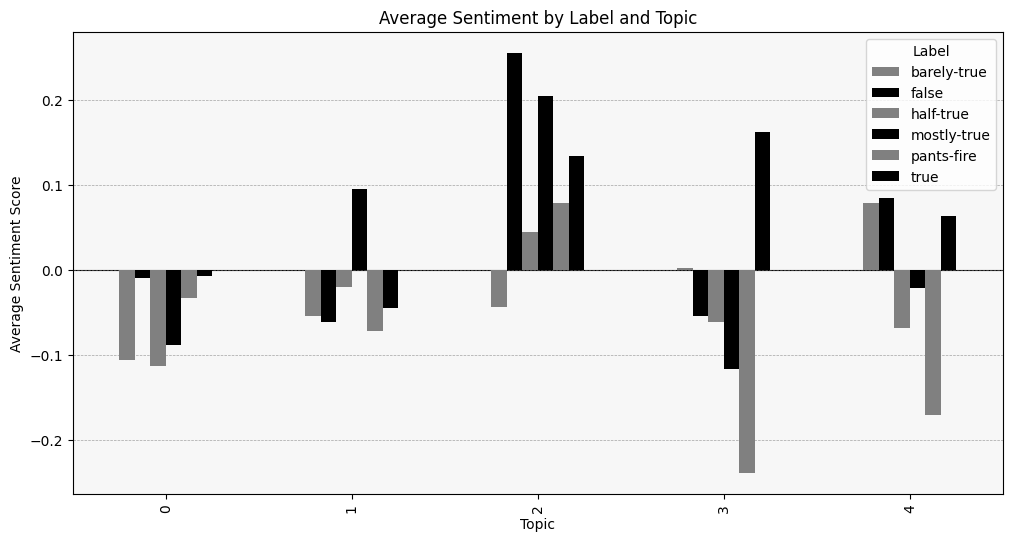

Topic Distribution Comparison:
        False Statements  True Statements
Topic                                   
0              0.406332         0.431953
1              0.129288         0.130178
2              0.197889         0.130178
3              0.118734         0.177515
4              0.147757         0.130178


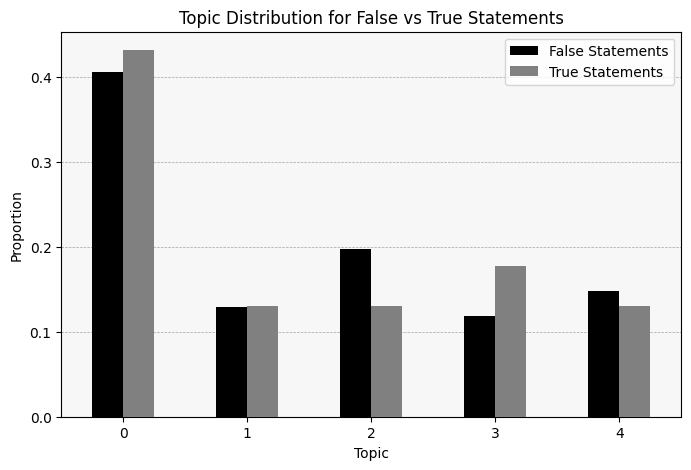

In [21]:
import topic_sentiment_analysis as tsa
importlib.reload(tsa)

sia = SentimentIntensityAnalyzer()
liar_data['Sentiment Score'] = liar_data['Statement'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Step 3: Sentiment Analysis by Topic
tsa.analyze_sentiment_by_topic(liar_data)

# Step 4: Analyze Proportion of False Statements
tsa.analyze_false_statement_proportion(liar_data)

# Step 5: Average Sentiment by Label and Topic
tsa.analyze_sentiment_by_label_and_topic(liar_data)

# Step 6: Compare Topic Distribution
tsa.compare_topic_distribution(liar_data)

Topic Distribution Comparison:
        False Statements  True Statements
Topic                                   
0              0.406332         0.431953
1              0.129288         0.130178
2              0.197889         0.130178
3              0.118734         0.177515
4              0.147757         0.130178


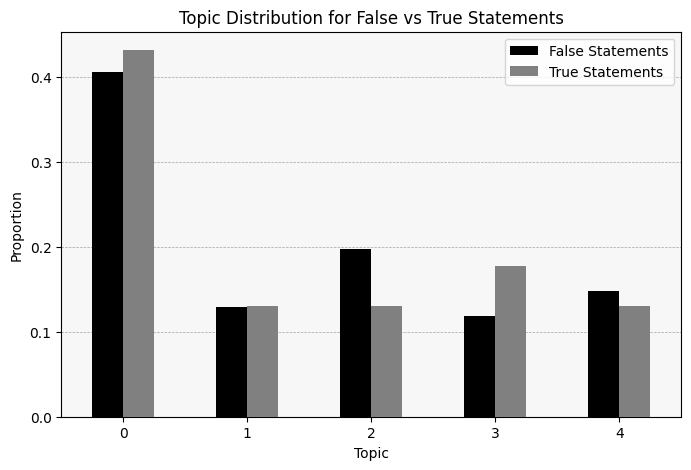

In [22]:
liar_data['Sentiment Score'] = liar_data['Statement'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Example: Compare Topic Distribution
comparison = tsa.compare_topic_distribution(liar_data)